<h2><span style="font-weight: 400;">Тема &ldquo;Обучение без учителя&rdquo;</span></h2>
<p><strong>Задание 1</strong></p>
<p><span style="font-weight: 400;">Импортируйте библиотеки pandas, numpy и matplotlib.</span></p>
<p><span style="font-weight: 400;">Загрузите "Boston House Prices dataset" из встроенных наборов&nbsp;</span></p>
<p><span style="font-weight: 400;">данных библиотеки sklearn.</span></p>
<p><span style="font-weight: 400;">Создайте датафреймы X и y из этих данных.</span></p>
<p><span style="font-weight: 400;">Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)</span></p>
<p><span style="font-weight: 400;">с помощью функции train_test_split так, чтобы размер тестовой выборки</span></p>
<p><span style="font-weight: 400;">составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.</span></p>
<p><span style="font-weight: 400;">Масштабируйте данные с помощью StandardScaler.</span></p>
<p><span style="font-weight: 400;">Постройте модель TSNE на тренировочный данных с параметрами:</span></p>
<p><span style="font-weight: 400;">n_components=2, learning_rate=250, random_state=42.</span></p>
<p><span style="font-weight: 400;">Постройте диаграмму рассеяния на этих данных.</span></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.datasets import load_boston

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape, X_train_tsne.shape

/home/dmitriy/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


((404, 13), (404, 2))

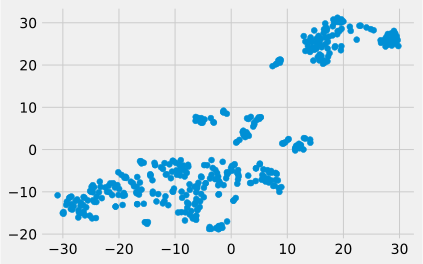

In [9]:
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

<p><strong>Задание 2</strong></p>
<p><span style="font-weight: 400;">С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,</span></p>
<p><span style="font-weight: 400;">используйте все признаки из датафрейма X_train.</span></p>
<p><span style="font-weight: 400;">Параметр max_iter должен быть равен 100, random_state сделайте равным 42.</span></p>
<p><span style="font-weight: 400;">Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,</span></p>
<p><span style="font-weight: 400;">и раскрасьте точки из разных кластеров разными цветами.</span></p>
<p><span style="font-weight: 400;">Вычислите средние значения price и CRIM в разных кластерах.</span></p>

In [10]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

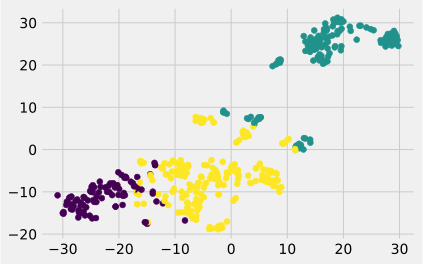

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [39]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: 27.78837209302326
Кластер 1: 16.165354330708663
Кластер 2: 24.958115183246072
Средние значения CRIM:
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


<p><strong>*Задание 3</strong></p>
<p><span style="font-weight: 400;">Примените модель KMeans, построенную в предыдущем задании,</span></p>
<p><span style="font-weight: 400;">к данным из тестового набора.</span></p>
<p><span style="font-weight: 400;">Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.</span></p>

In [40]:
labels_test = kmeans.predict(X_test_scaled)

In [41]:
print('Средние price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))
print('Средние CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: 31.35
Кластер 1: 16.43714285714286
Кластер 2: 21.860784313725492
Средние значения CRIM:
Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143
Кластер 2: 0.26607882352941176
